**✅ Asmaa Ibrahim (Internship 3)**

#Import Libraries

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

#Load the Dataset

In [97]:
data = pd.read_csv('/content/first inten project.csv')

#Data Preprocessing Stage 1

In [98]:
print(data.isnull().sum())
print(data.duplicated().sum())

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64
0


In [99]:
data.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [38]:
data.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [100]:
# Data Cleaning and Preprocessing
data.columns = data.columns.str.strip()
for col in data.select_dtypes(include=["object"]).columns:
    data[col] = data[col].replace(r'\s+', ' ', regex=True)

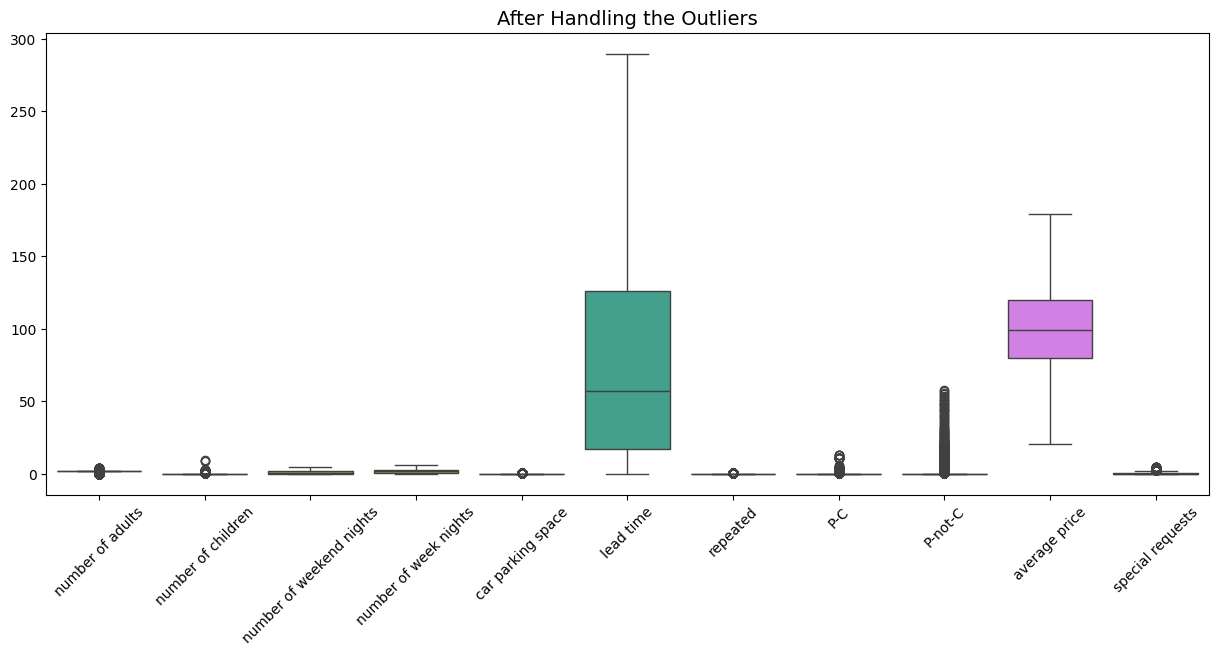

In [101]:
#Handle Outliers using IQR Method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)  # Cap values

outlier_columns = ["number of weekend nights", "number of week nights", "lead time", "average price"]
for col in outlier_columns:
    cap_outliers(data, col)

#Plot the results After Handling the Outliers
plt.figure(figsize=(15, 6))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.title("After Handling the Outliers", fontsize=14)
plt.show()

In [102]:
# Convert Date Columns
data['date of reservation'] = pd.to_datetime(data['date of reservation'], errors='coerce')

# Feature Engineering
data['reservation_month'] = data['date of reservation'].dt.month
data['reservation_year'] = data['date of reservation'].dt.year
data['reservation_day'] = data['date of reservation'].dt.day
data['total_people'] = data['number of adults'] + data['number of children']
data['total_nights'] = data['number of weekend nights'] + data['number of week nights']

# Handle Missing Values
data.fillna(data.median(numeric_only=True), inplace=True)


# Data Visualization

##Visualize each Feature

<ipython-input-43-9693a3cf3557>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette="Blues")


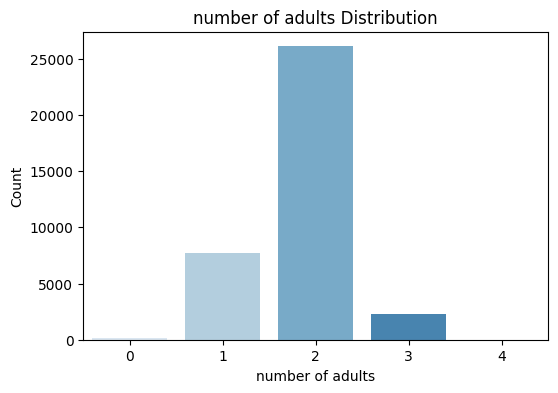

<ipython-input-43-9693a3cf3557>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette="Blues")


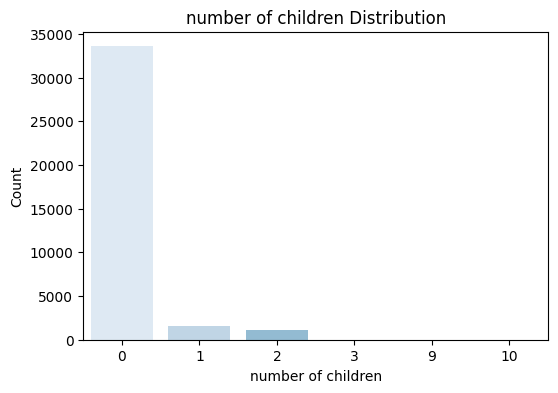

<ipython-input-43-9693a3cf3557>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette="Blues")


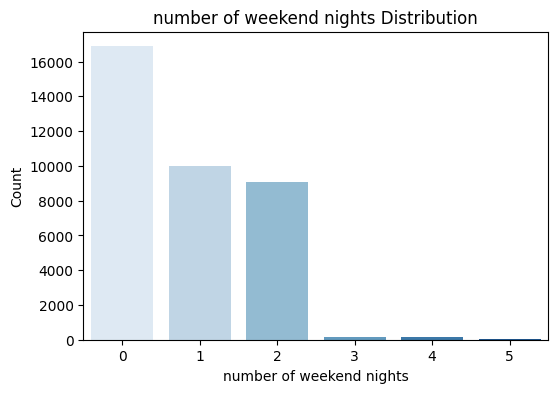

<ipython-input-43-9693a3cf3557>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette="Blues")


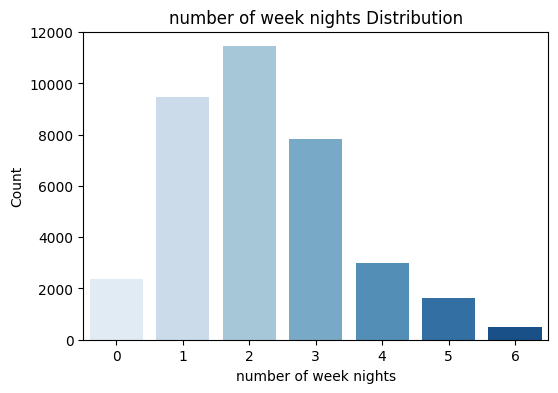

<ipython-input-43-9693a3cf3557>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette="Blues")


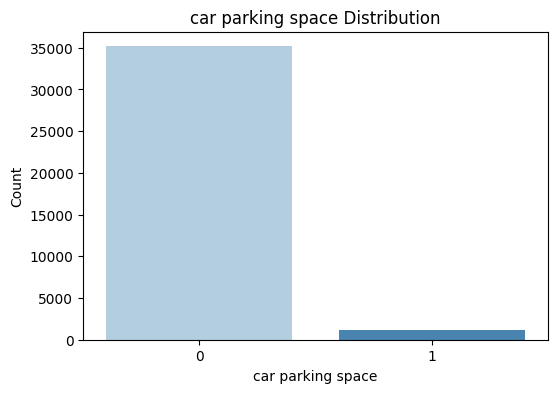

<ipython-input-43-9693a3cf3557>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette="Blues")


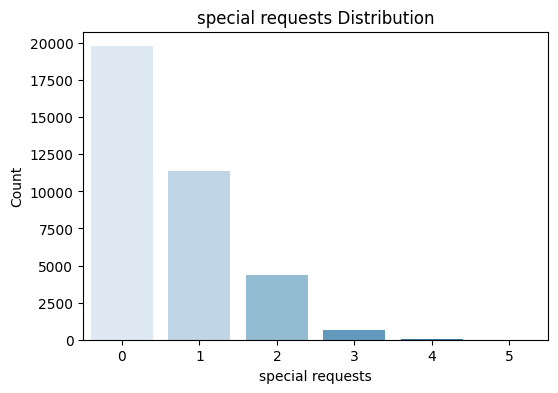

<ipython-input-43-9693a3cf3557>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette="Blues")


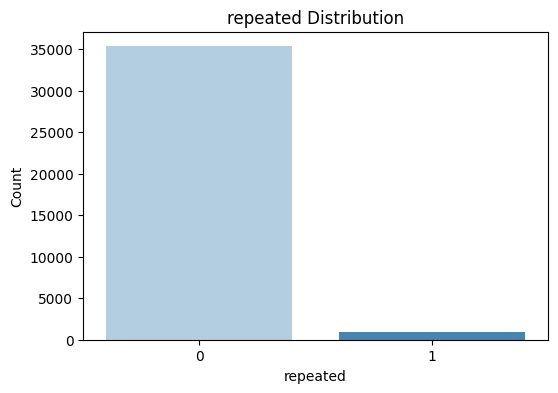

<ipython-input-43-9693a3cf3557>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette="Blues")


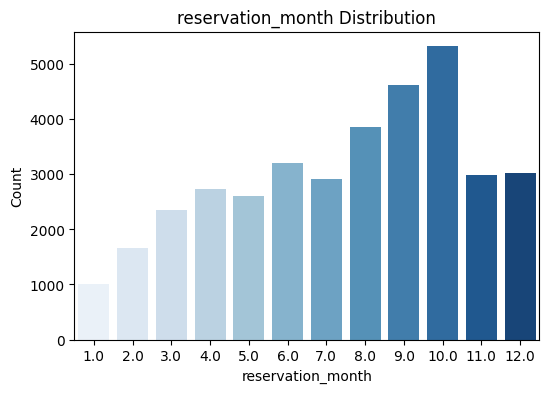

<ipython-input-43-9693a3cf3557>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette="Blues")


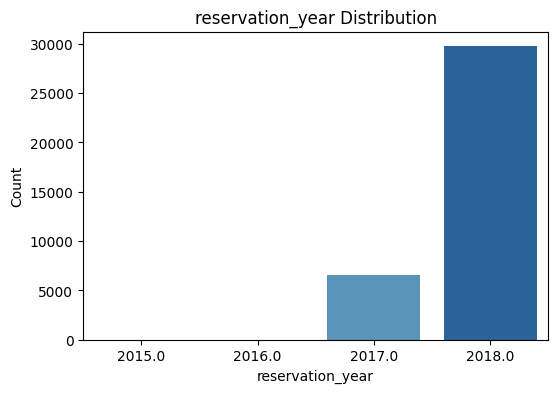

In [43]:
#Numeric data distribution
Numeric_data= data[['number of adults', 'number of children', 'number of weekend nights',
                   'number of week nights', 'car parking space','special requests','repeated','reservation_month', 'reservation_year']]
for col in Numeric_data:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=data[col], palette="Blues")
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

<ipython-input-44-600c3540eb8d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette="Blues")


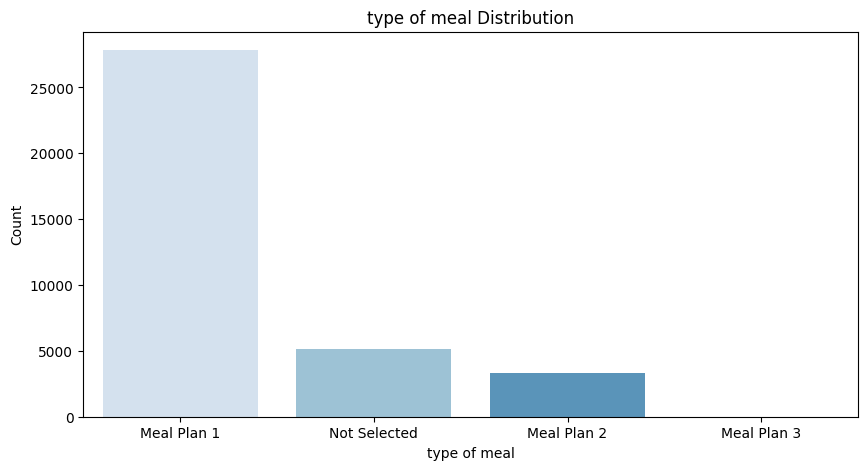

<ipython-input-44-600c3540eb8d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette="Blues")


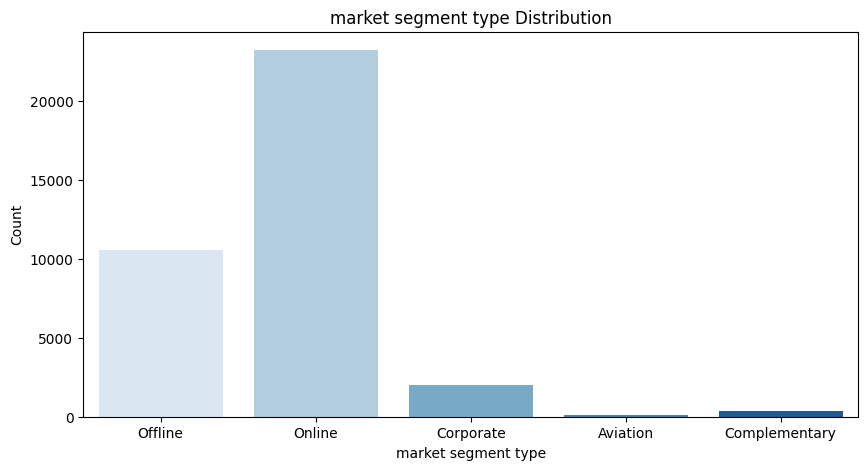

<ipython-input-44-600c3540eb8d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette="Blues")


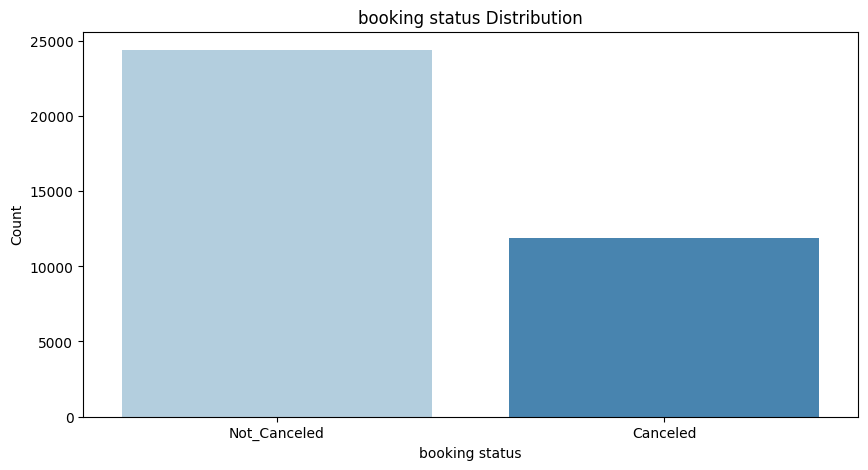

In [44]:
#Categorical data distribution
Categorical_data= data[['type of meal', 'market segment type', 'booking status']]

for col in Categorical_data:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=data[col], palette="Blues")
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

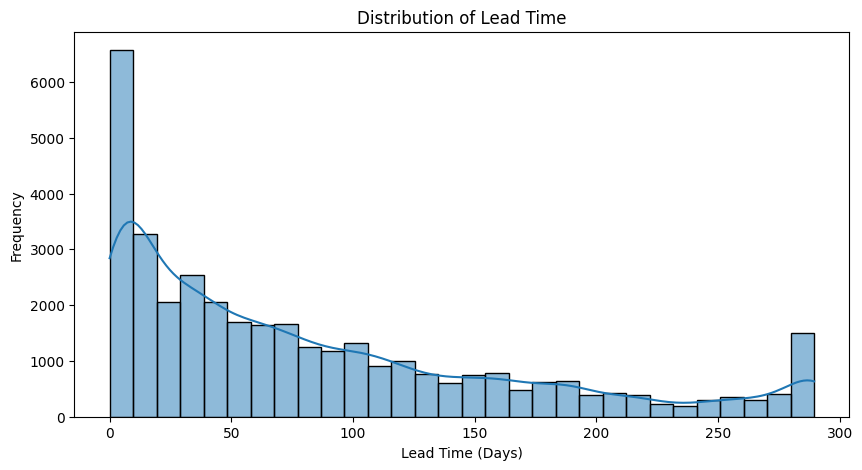

In [45]:
# Histogram for lead time
plt.figure(figsize=(10, 5))
sns.histplot(data['lead time'], bins=30, kde=True)
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Frequency')
plt.show()

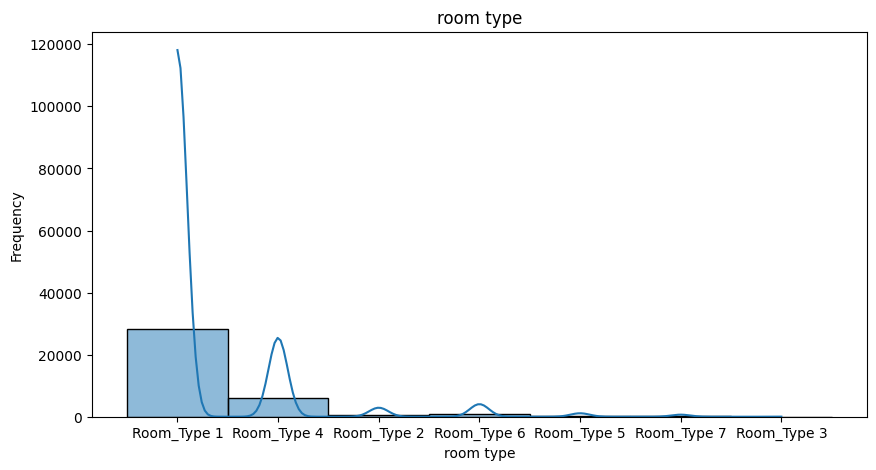

In [46]:
# Histogram for room type
plt.figure(figsize=(10, 5))
sns.histplot(data['room type'], bins=30, kde=True)
plt.title('room type')
plt.xlabel('room type')
plt.ylabel('Frequency')
plt.show()

##Visualize the Relation between each Feature

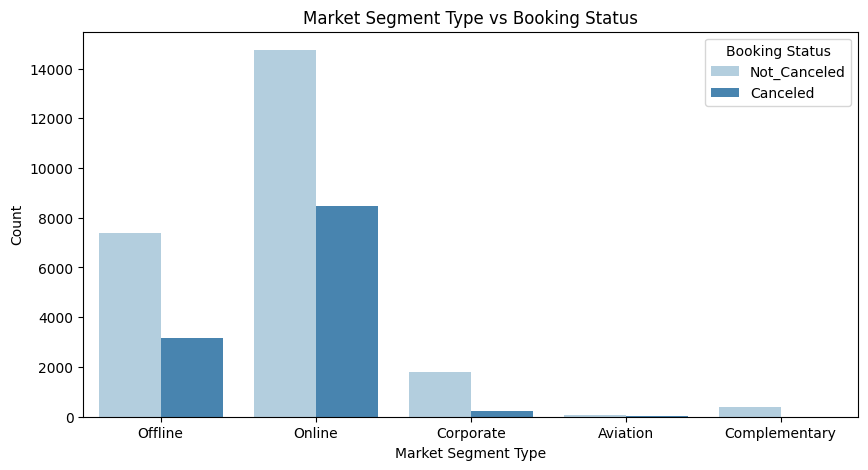

In [47]:
#plot Market Segment Type vs Booking Status
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x="market segment type", hue="booking status", palette="Blues")
plt.title("Market Segment Type vs Booking Status")
plt.xlabel("Market Segment Type")
plt.ylabel("Count")
plt.legend(title="Booking Status")
plt.show()

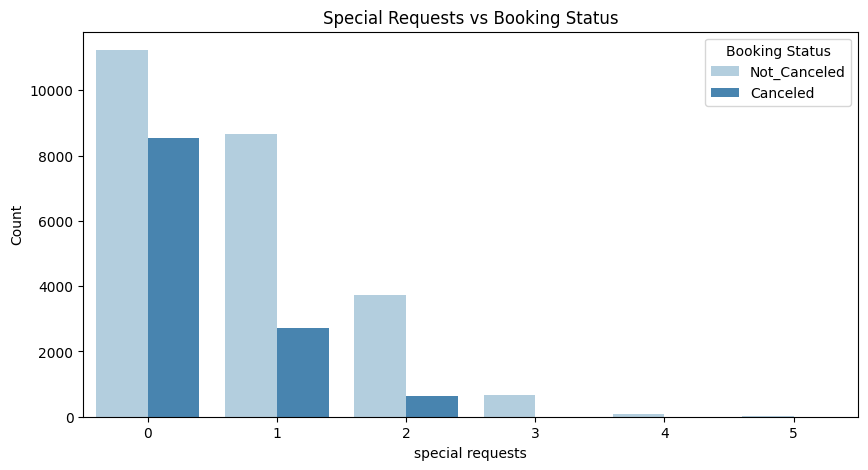

In [48]:
#plot special requests Type vs Booking Status
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x="special requests", hue="booking status", palette="Blues")
plt.title("Special Requests vs Booking Status")
plt.xlabel("special requests")
plt.ylabel("Count")
plt.legend(title="Booking Status")
plt.show()

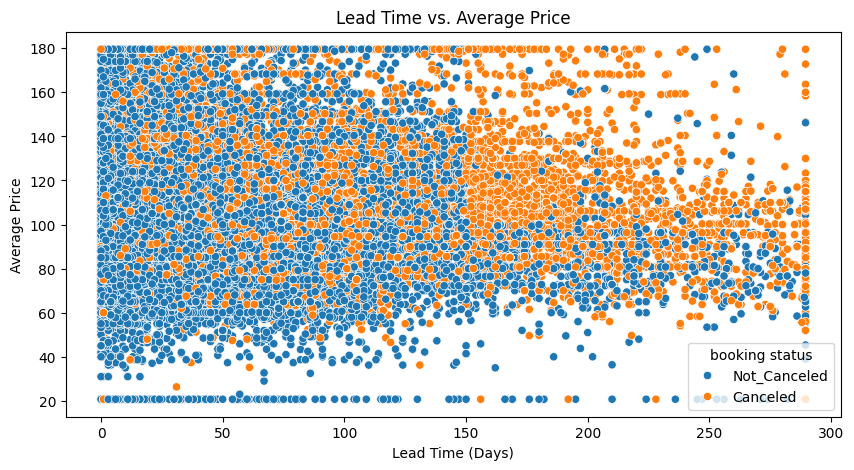

In [49]:
#plot Lead Time vs. Average Price
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='lead time', y='average price', hue='booking status')
plt.title('Lead Time vs. Average Price')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Average Price')
plt.show()

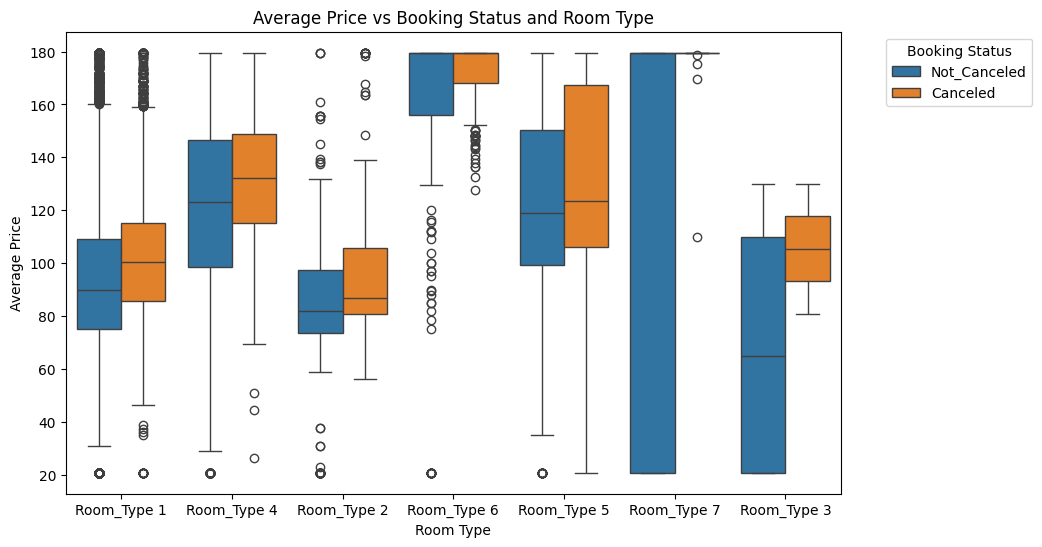

In [50]:
# Plot Average Price vs Booking Status and Room Type
plt.figure(figsize=(10, 6))
sns.boxplot(x="room type", y="average price", hue="booking status", data=data)
plt.title("Average Price vs Booking Status and Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average Price")
plt.legend(title="Booking Status", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


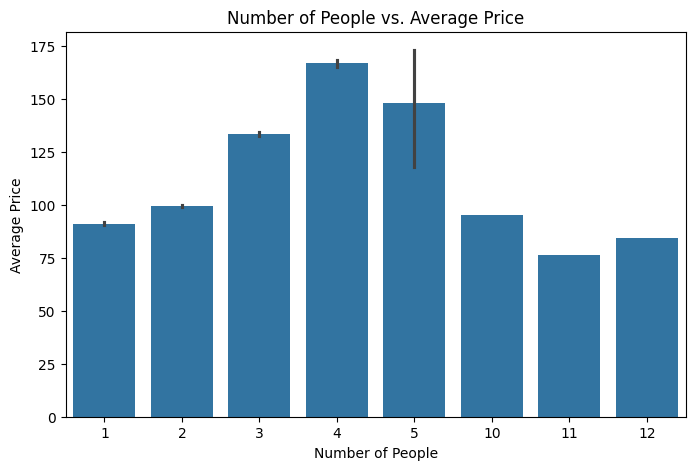

In [51]:
#Plot Number of People vs. Average Price
plt.figure(figsize=(8, 5))
sns.barplot(x=data['number of adults'] + data['number of children'], y=data['average price'])
plt.title('Number of People vs. Average Price')
plt.xlabel('Number of People')
plt.ylabel('Average Price')
plt.show()

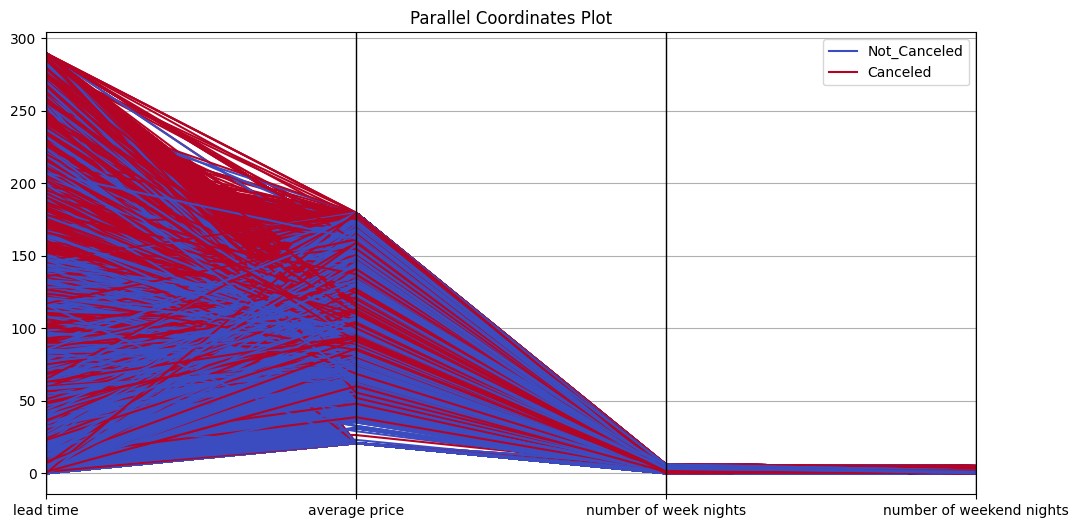

In [52]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(12, 6))
parallel_coordinates(data[['lead time', 'average price', 'number of week nights', 'number of weekend nights', 'booking status']],
                     class_column='booking status', colormap='coolwarm')
plt.title('Parallel Coordinates Plot')
plt.show()

In [53]:
import plotly.graph_objects as go

labels = data['market segment type'].unique().tolist() + data['room type'].unique().tolist() + data['booking status'].unique().tolist()
source = []
target = []
values = []

for segment in data['market segment type'].unique():
    for room in data['room type'].unique():
        count = len(data[(data['market segment type'] == segment) & (data['room type'] == room)])
        source.append(labels.index(segment))
        target.append(labels.index(room))
        values.append(count)

for room in data['room type'].unique():
    for status in data['booking status'].unique():
        count = len(data[(data['room type'] == room) & (data['booking status'] == status)])
        source.append(labels.index(room))
        target.append(labels.index(status))
        values.append(count)

fig = go.Figure(go.Sankey(node=dict(label=labels), link=dict(source=source, target=target, value=values)))
fig.show()

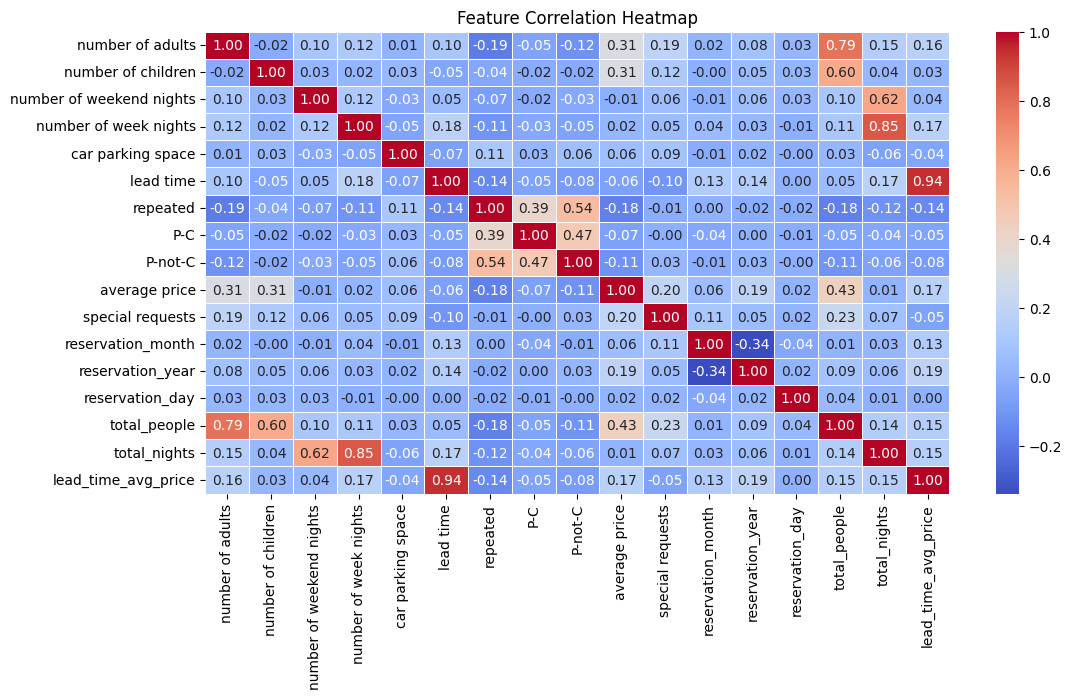

In [54]:
# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

#Data Preprocessing Stage 2

In [103]:
# Encode Categorical Features
categorical_cols = ["Booking_ID", "type of meal", "room type", "market segment type", "booking status"]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

In [104]:
data = data.drop(["Booking_ID", "P-C", "P-not-C", "car parking space", "date of reservation", "repeated",
                  "number of adults", "number of children", "number of week nights", "number of weekend nights" ], axis=1)


In [105]:
# Feature Scaling
X = data.drop(columns=['booking status'])
y = data['booking status']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [106]:
# PCA for Dimensionality Reduction
pca = PCA(n_components=len(X.columns))
X_pca = pca.fit_transform(X_scaled)
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
X_pca_reduced = X_pca[:, :n_components]

In [107]:
# Handle Imbalanced Data using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pca_reduced, y)

In [108]:
# Compute Class Weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_resampled), y=y_resampled)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}


# Machine Learning Models

## Train models

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [110]:
# KNN Classifier
knn_params = {
    'n_neighbors': range(1, 10),
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
knn_model = KNeighborsClassifier()
grid_knn = GridSearchCV(knn_model, knn_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_report = classification_report(y_test, y_pred_knn)

In [111]:
# Random Forest Classifier with Class Weights
rf = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight=class_weight_dict, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)

##Model Evaluation


In [112]:
print("KNN Model:")
print(f"Accuracy: {knn_accuracy}")
print(knn_report)

KNN Model:
Accuracy: 0.9007070396557024
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4833
           1       0.93      0.87      0.90      4926

    accuracy                           0.90      9759
   macro avg       0.90      0.90      0.90      9759
weighted avg       0.90      0.90      0.90      9759



In [113]:
print("Random Forest Model:")
print("RF Accuracy:", rf_accuracy)
print(rf_report)

Random Forest Model:
RF Accuracy: 0.8580797212829183
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4833
           1       0.86      0.86      0.86      4926

    accuracy                           0.86      9759
   macro avg       0.86      0.86      0.86      9759
weighted avg       0.86      0.86      0.86      9759

